# PHYS270 Assignment 5: Numerical Optimization

#Abstract
In this work different approaches for function optimization were compared. The first method was random search and the second one was Broyden — Fletcher — Goldfarb — Shanno algorithm. Both these methods allowed to find the maximum of a complex function which represented the probability density function of a wave. <br>
The amount of work done allows to conclude that the optimization method used "from the box" in Scientific-python library finds the function maximum very precisely, while the random search lacks accuracy.

#Introduction
In this work I optimized a probability density function of a wave function. For this purpose I first of all visually evaluated the function and decided where the maximum should have occurred and then I applied random search algorithm to find this maximum. Knowing that the random search could be not very precise I started searching for the maximum using Broyden — Fletcher — Goldfarb — Shanno algorithm from the point which was predicted by the random search algorithm.

#Methods

In [ ]:
import numpy as np 
import numpy.random as rand
import matplotlib.pyplot as plt
%matplotlib inline

Let us assume that the numerical values of the parameters in the above wave function are: <br> 
$\gamma=1/25$, <br> 
$k_{1x}=5$, $k_{1y}=0$, <br> 
$k_{2x}=0$, $k_{2y}=5$, <br> 
$k_{3x}=3$, $k_{3y}=-4$, <br> 
$a_1=-5$, $b_1=0$, <br> 
$a_2=4$, $b_2=4$, <br> 
$a_3=0$, $b_3=-5$.

In [ ]:
a_1, a_2, a_3 = [-5, 4, 0]
b_1, b_2, b_3 = [0, 4, -5]
k_x_1, k_x_2, k_x_3 = [5, 0, 3]
k_y_1, k_y_2, k_y_3 = [0, 5, -4]
g = np.float(1/25)

$$\psi(x,y) = \exp[-\gamma ((x-a_{1})^2+(y-b_{1})^2) + i (k_{1x} x + k_{1y}y)]+\exp[-\gamma ((x-a_{2})^2+(y-b_{2})^2) + i (k_{2x} x + k_{2y}y)] + \exp[-\gamma ((x-a_{3})^2+(y-b_{3})^2) + i (k_{3x} x + k_{3y}y)],$$

In [ ]:
def wave_func(x, y):
  return (np.exp(-g*((x-a_1)**2+(y-b_1)**2)+1j*(k_x_1*x+k_y_1*y)) +  
         np.exp(-g*((x-a_2)**2+(y-b_2)**2)+1j*(k_x_2*x+k_y_2*y)) +
         np.exp(-g*((x-a_3)**2+(y-b_3)**2)+1j*(k_x_3*x+k_y_3*y)))
         

In [ ]:
wave_func(0, 0)

(1.0137961827960789+0j)

The probability density of finding a particle at point $(x,y)$ in space is given by the absolute square of the wave function:
$$\rho(x,y) = |\psi(x,y)|^2$$

In [ ]:
def prob_density(x,y):
  return np.abs(wave_func(x,y))**2

In [ ]:
N = 2000
x_theor = np.linspace(-10, 10, N)
y_theor = np.linspace(-10, 10, N)

X, Y = np.meshgrid(x_theor, y_theor)
Z = prob_density(X, Y)

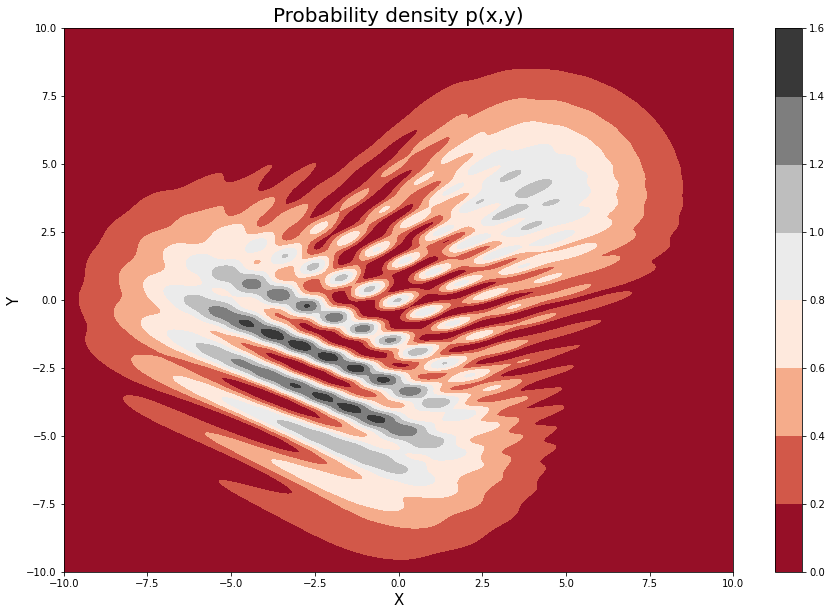

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
cp = ax.contourf(X, Y, Z, cmap="RdGy")
fig.colorbar(cp) 

ax.set_title('Probability density p(x,y)',fontsize=20)
ax.set_xlabel('X',  fontsize=15)
ax.set_ylabel('Y',  fontsize=15)

plt.show()

it is seen that this function has several maxima, so I have to pick the starting point very precisely. I think that I can start searching in a window which starts at (-5, -5) and ends at (2.5, 2.5)

To decide if the found maxima is a real maxima, I will calculate gradient in the predicted point. For this purpose numerical differentiation will be used

In [ ]:
 def numerical_grad(x, y, h = 1e-11):
  dz_dx = (prob_density(x + h,y)-prob_density(x - h,y))/(2 * h)
  dz_dy = (prob_density(x,y + h)-prob_density(x,y - h))/(2 * h)
  print("The numerical value of gradient at the point", x, y, "is", "(",dz_dx, dz_dy, ")")

#Methodology
# Algorithm of random search
Random search algorithm is based on picking a random point close to the starting point and then deciding if the value of function in this point is greated than the current one. If it is -> algorithm is run from this  point, otherwise another point is randomly picked.

In [ ]:
borders = [-5, 2.5, -5, 2.5]
def random_search(borders = [-5, 2.5, -5, 2.5], max_iter = 200):
  x_best = rand.uniform(borders[0], borders[1])
  y_best = rand.uniform(borders[2], borders[3])
  z_best = prob_density(x_best, y_best)
  tries = 1
 
  while tries < max_iter:
      rand1 = rand.randn(1)
      rand2 = rand.randn(1)
      x_new = borders[0] + (borders[1] - borders[0])*rand1
      y_new = borders[2] + (borders[3] - borders[2])*rand2
      z_new = prob_density(x_new, y_new)[0]

      if z_new > z_best :
          x_best = x_new
          y_best = y_new
          z_best = z_new
          print(f"After {tries} new maximum found: x = {x_best}, y = {y_best}, z = {z_best}")
      
      tries+=1
  
  print(f"Result x = {x_best}, y = {y_best}, z = {z_best}")
  return x_best, y_best, z_best

In [ ]:
x_best_random, y_best_rand, proba_rand = random_search(borders, 500)

After 3 new maximum found: x = [-2.42268186], y = [1.16070703], z = 0.9644266455058415
After 40 new maximum found: x = [0.04957634], y = [-4.80704914], z = 1.337546417072422
After 41 new maximum found: x = [-4.07057024], y = [-1.2182841], z = 1.3903317965449788
After 152 new maximum found: x = [-1.10301849], y = [-2.50090478], z = 1.4571509155027487
After 317 new maximum found: x = [-2.2343173], y = [-2.08520084], z = 1.5183714043898062
Result x = [-2.2343173], y = [-2.08520084], z = 1.5183714043898062


It took 317 iterations to find the maxima. But is it rally a maxima?

In [ ]:
numerical_grad(x_best_random, y_best_rand)

The numerical value of gradient at the point [-2.2343173] [-2.08520084] is ( [0.59988681] [0.21629365] )


Actually, the gradient is far from 0, so the result is not very precise

#Alternative way of optimization (using python packeges)
I will use Scientific Python package for numerical optimization. From my point of view, the best algorithm to use is Broyden — Fletcher — Goldfarb — Shanno algorithm
<br>
This algorithm iteratively finds moves from one point to another, using the gradient at the initial point to find the direction and step-size. The movement is in the direction of anti-gradient. What does it mean?
<br>
It means that the algorithm is suitable for function *minimization*, so the initial function should be changed. I will utilize its value with the minus sign.

In [ ]:
import scipy.optimize as optimization_tool

In [ ]:
def inverse_proba(*args):
  args = args[0]
  return prob_density(args[0], args[1]) * (-1)

In [ ]:
res = optimization_tool.minimize(inverse_proba, [-1.1461626800287754, -2.4993771797148003], method='BFGS', options={'disp': True})
print("The greatest probability is at", *res.x, "it is", -inverse_proba(res.x))

Optimization terminated successfully.
         Current function value: -1.531393
         Iterations: 5
         Function evaluations: 28
         Gradient evaluations: 7
The greatest probability is at -1.2731759560560088 -2.5151805780597565 it is 1.5313927343978524


Let us check the gradient at the point

In [ ]:
numerical_grad(res.x[0], res.x[1])

The numerical value of gradient at the point -1.2731759560560088 -2.5151805780597565 is ( 0.0 3.3306690738754696e-05 )


It is seen that the gradient is really close to 0

#Conclusion
In this work we have found a very useful approach for numerical optimization. We can use a combination of random search algorithm and the Broyden — Fletcher — Goldfarb — Shanno algorithm  during labworks in order to find the maximum and / or minimum of a function which is researched. 